In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

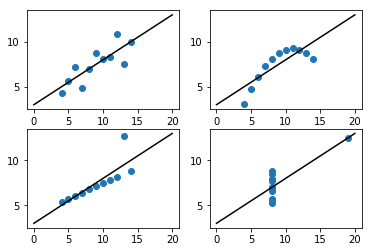

'\nWhile all 4 graphs have similar summary statistics and lines of best fit, the patters in the data\nare very different for all 4 and would not have been clear without graphing. In the first one, we see\nthe data increase aproximately linearly along the line of best fit, albeit with some variation. In the\nsecond graph, the data seems to be negative quadratic. In the third the data is mostly linear but with a\nslope less than 1/2 but an outlier pulls the slope back up, while in the fourth graph, the points are \nnearly vertical with the exception of an outlier which reduces the slope to 1/2. \n'

In [7]:
""" Problem 1 """

data = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/anscombe.npy")

def prob1(data):
    x = np.linspace(0,20,1000)
    y = 0.5*x + 3

    plt.subplot(221)
    plt.plot(data[:,0], data[:,1], 'o')
    plt.plot(x,y,'k')

    plt.subplot(222)
    plt.plot(data[:,2], data[:,3], 'o')
    plt.plot(x,y,'k')

    plt.subplot(223)
    plt.plot(data[:,4], data[:,5], 'o')
    plt.plot(x,y,'k')

    plt.subplot(224)
    plt.plot(data[:,6], data[:,7], 'o')
    plt.plot(x,y,'k')

    plt.show()

prob1(data)
"""
While all 4 graphs have similar summary statistics and lines of best fit, the patters in the data
are very different for all 4 and would not have been clear without graphing. In the first one, we see
the data increase aproximately linearly along the line of best fit, albeit with some variation. In the
second graph, the data seems to be negative quadratic. In the third the data is mostly linear but with a
slope less than 1/2 but an outlier pulls the slope back up, while in the fourth graph, the points are 
nearly vertical with the exception of an outlier which reduces the slope to 1/2. 
"""

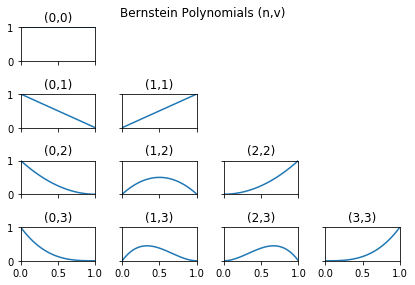

In [20]:
""" Problem 2 """
import scipy.misc

def prob2(x):
    for n in range(4):
        for v in range(n+1):
            Bernstein = scipy.misc.comb(n,v)*(x**v)*((1-x)**(n-v))
            plt.subplot(4, 4, 4*n + v + 1)
            plt.plot(x, Bernstein)
            plt.axis([0,1,0,1])
            plt.title("(" + str(v) + "," + str(n)+ ")")
            if n!=3:
                plt.tick_params(labelbottom="off")
            if v%4:
                plt.tick_params(labelleft="off")

    plt.suptitle("Bernstein Polynomials (n,v)")
    plt.tight_layout()
    plt.show()

x = np.linspace(-1, 1, 200)
prob2(x)

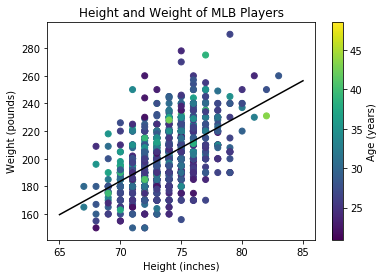

In [10]:
""" Problem 3 """

height, weight, age = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/MLB.npy").T

def prob3(heigh, weight, age):
    m,b = np.polyfit(height, weight, 1)
    x = np.linspace(65,85,1000)
    y = m*x + b
    plt.plot(x,y,'k')

    plt.scatter(height, weight, c=age)
    plt.xlabel("Height (inches)")
    plt.ylabel("Weight (pounds)")

    cbar = plt.colorbar()
    cbar.set_label("Age (years)")

    plt.title("Height and Weight of MLB Players")
    plt.show()
    
    
height, weight, age = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/MLB.npy").T
prob3(height,weight,age)

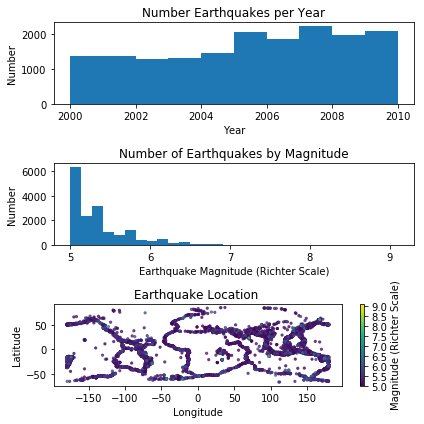

In [21]:
""" Problem 4 """


def prob4(year, magnitude, longitude, latitude):
    
    plt.figure(figsize=(6, 6)) 
    plt.subplot(311)
    plt.hist(year, bins=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
    plt.xlabel("Year")
    plt.ylabel("Number")
    plt.title("Number Earthquakes per Year")

    plt.subplot(312)
    plt.hist(magnitude, bins=30)
    plt.xlabel("Earthquake Magnitude (Richter Scale)")
    plt.ylabel("Number")
    plt.title("Number of Earthquakes by Magnitude")

    plt.subplot(313)
    plt.scatter(longitude, latitude, c=magnitude, s = 5, alpha=.7)
    cbar = plt.colorbar()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    cbar.set_label("Magnitude (Richter Scale)")
    plt.title("Earthquake Location ")

    plt.tight_layout()
    plt.show()

    
year, magnitude, longitude, latitude  = np.load('/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/earthquakes.npy').T
prob4(year, magnitude, longitude, latitude)

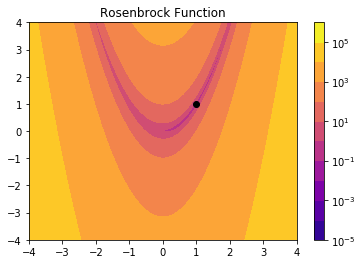

In [21]:
""" Problem 5 """
from matplotlib.colors import LogNorm

def plot5(x):
    X, Y = np.meshgrid(x, x.copy())
    Z = (1-X)**2 + 100*((Y-X**2)**2)
    plt.contourf(X, Y, Z, cmap="plasma", norm=LogNorm())
    plt.colorbar()
    plt.plot(1,1,"ko")
    plt.title("Rosenbrock Function")
    plt.show()

x = np.linspace(-4, 4, 1000)
plot5(x)

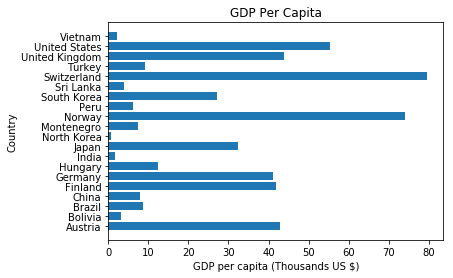

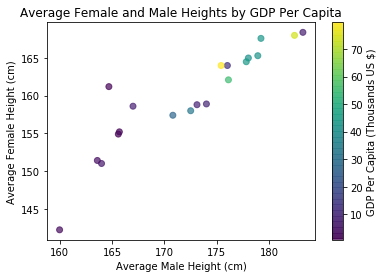

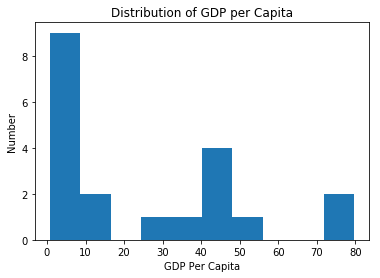

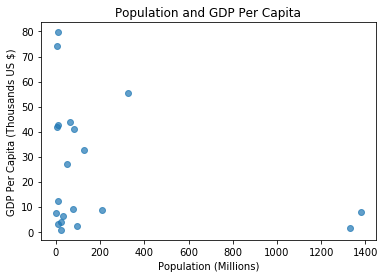

'\nWe can learn about several interesting relationships in the data. First, average male and average female height\nincrease together and are positively correlated. Similarly, height of the both female and males inceases\nas GDP increases as well. This possible indicates a relationship between height and living standards. However,\nwe do not see a clear relatinship between GDP and population. China and India can be considered outliers,\nand GDP Per Capita varier per given population. On the whole, there is a large share of countries in our sample\nwith very small GDP Per Capita of less than $20,000 and very few about $70,000. \n\n'

In [13]:
""" Problem 6 """


def prob6(pop, GDP, avmale, avfemale, countries):
    positions = np.arange(len(countries))
    
    GDPcap  = GDP/pop
    
    plt.barh(positions, GDPcap, align="center")
    plt.yticks(positions, countries)
    plt.title("GDP Per Capita")
    plt.ylabel("Country")
    plt.xlabel("GDP per capita (Thousands US $)")
    plt.show()

    plt.scatter(avmale, avfemale, c=GDPcap, alpha=0.7)
    cbar = plt.colorbar()
    plt.xlabel("Average Male Height (cm)")
    plt.ylabel("Average Female Height (cm)")
    cbar.set_label("GDP Per Capita (Thousands US $)")
    plt.title("Average Female and Male Heights by GDP Per Capita")
    plt.show()

    plt.hist(GDPcap, bins=10)
    plt.title("Distribution of GDP per Capita")
    plt.ylabel("Number")
    plt.xlabel("GDP Per Capita")
    plt.show()
    
    
    plt.scatter(pop, GDPcap, alpha=0.7)
    plt.xlabel("Population (Millions)")
    plt.ylabel("GDP Per Capita (Thousands US $)")
    plt.title("Population and GDP Per Capita")
    plt.show()

pop, GDP, avmale, avfemale = np.load('/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/countries.npy').T

countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]

prob6(pop, GDP, avmale, avfemale, countries)

"""
We can learn about several interesting relationships in the data. First, average male and average female height
increase together and are positively correlated. Similarly, height of the both female and males inceases
as GDP increases as well. This possible indicates a relationship between height and living standards. However,
we do not see a clear relatinship between GDP and population. China and India can be considered outliers,
and GDP Per Capita varier per given population. On the whole, there is a large share of countries in our sample
with very small GDP Per Capita of less than $20,000 and very few about $70,000. 

"""